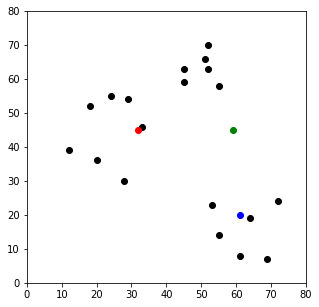

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7,24]
})

# np.random.seed(200)

k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [8]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


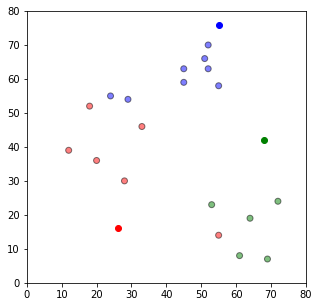

In [2]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [3]:
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


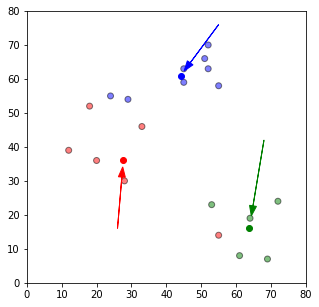

In [3]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

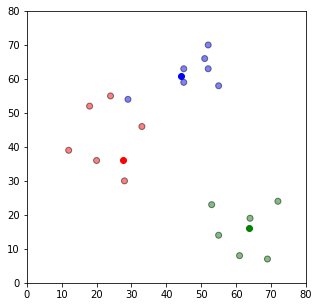

In [4]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

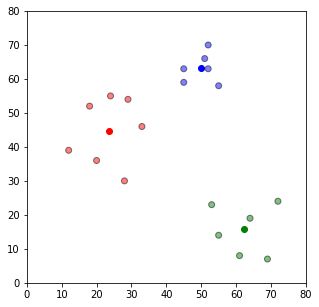

In [5]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [6]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

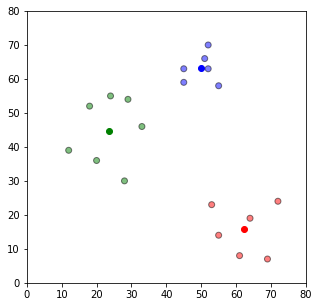

In [9]:
fig = plt.figure(figsize=(5, 5))

colors =list( map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [22]:
a=[1,2,3,4,5]
b=[1,2,1,4,5]

In [23]:
if(a==b):
    print('hi')
else:
    print('none')


none


In [ ]:
import json
import pandas as pd
import math
import numpy as np
import tensorflow as tf
import sys

def input_fn():
    global dfaces

    return tf.train.limit_epochs(
      tf.convert_to_tensor(dfaces.values, dtype=tf.float32), num_epochs=1)

def get_embedding_dataframe(path):
    df = pd.read_json(path, lines = True)
    df['face_embeddings']=df['_source'].apply(lambda x: x['face_embeddings'])
    df['unique_id_index']=df['_source'].apply(lambda x: x['unique_id_index'])
    dfaces = df["face_embeddings"]
    dfaces2 = df["unique_id_index"]
    del df
    return pd.DataFrame(list(dfaces.values)),pd.DataFrame(list(dfaces2.values))

def euc(v1,v2):
    s = 0
    for x,y in zip(v1,v2):
        s = s + (x-y)**2
    value = s**0.5
    return value

path = '/home/*/Desktop/non_news_rss.json'

dfaces,dfaces2 = get_embedding_dataframe(path)

dfaces=dfaces[:1000]
num_clusters=math.ceil((len(dfaces)/2)**(1/2))
kmeans = tf.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)
print("---------------SAVING MODEL----------------")
# train
num_iterations = 200
previous_centers = []
for i in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    cluster_centers=np.array(cluster_centers)
    if np.array_equal(previous_centers,cluster_centers):
        print('("---------------("---------------("---------------("---------------("---------------("---------------')
        print(i)
        break
    else:
        print("ITTT",i)
    previous_centers = cluster_centers

cluster_indices = list(kmeans.predict_cluster_index(input_fn))
cluster_centers =cluster_centers.tolist()
with open('cluster_centers.json', 'w') as json_file:
    json.dump(cluster_centers, json_file)
for ix,i in enumerate(cluster_indices):
    cluster_indices[ix]=int(cluster_indices[ix])
with open('cluster_indices.json', 'w') as json_file:
    json.dump(cluster_indices, json_file)

dfaces2 = dfaces2[0].values.tolist()
with open('id_data.json', 'w') as json_file:
    json.dump(dfaces2, json_file)




INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr66_glqy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbaf8924358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
---------------SAVING MODEL----------------
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Do

In [12]:
previous_centers

array([[ 0.12955773, -0.9352768 ,  0.7610909 , ..., -1.1960618 ,
        -0.28532404,  0.21048559],
       [-0.6217172 , -0.8597539 ,  1.7065808 , ..., -1.3999275 ,
        -0.10511821,  0.08882917],
       [ 0.50417805,  0.07510948,  0.24364686, ..., -0.72725546,
         0.3145155 , -0.15663138],
       ...,
       [ 0.40498716, -0.7733544 ,  0.38582927, ..., -0.8895748 ,
        -0.7395067 , -0.6158412 ],
       [ 0.26362178, -0.931202  ,  0.10090514, ..., -0.9131424 ,
        -0.32705173, -0.21606536],
       [ 0.08110681, -0.48709124, -0.2220918 , ..., -0.7684603 ,
        -0.23026602,  0.31530702]], dtype=float32)

In [17]:
if np.array_equal(previous_centers,cluster_centers):
    print('hi')

hi
